### 4a. Gradient
1. Unit normal to the surface
2. Directional derivative
3. Max directional derivative
4. Angle between the surfaces. 
5. Distance from the origin to the plane
6. Plotting gradient field with NumPy

In [1]:
# INIT
from sympy import *
x, y, z = symbols('x y z ')
from sympy.vector import CoordSys3D, Del

C = CoordSys3D('C')                     
r = x*C.i + y*C.j + z*C.k               


**1. Unit normal to the surface.** Find a unit normal to the surface $ x^2y + 2xz =4$
  at the point (2,-2,3). [Sch61/6]

In [2]:
# Unit normal to the surface.


# INPUT
f = C.x**2*C.y + 2*C.x*C.z - 4                          # Surface f = 0
P = [2,-2,3]                                            # A point of surface

# The gradient is a normal to the surface. 

# CALCULATION
grd =  Del().gradient(f).doit()                         # The gradient expression  (vectorfield)
grd_P = grd.evalf(subs={C.x:P[0], C.y:P[1], C.z:P[2]})  # The gradient at point P (vector)
norm_grd_P = sqrt(grd_P.dot(grd_P) )                    # The lenght of the gradient vector at P
n = grd_P/norm_grd_P                                    # The unit normal to the surface f at P

# OUTPUT
print('The gradient (3D vectorfield) is', grd)
print('The unit normal is', nsimplify(n))               # decimal to rational: nsimplify()
print('The unity check of n:', nsimplify(n.dot(n)))


The gradient (3D vectorfield) is (2*C.x*C.y + 2*C.z)*C.i + C.x**2*C.j + 2*C.x*C.k
The unit normal is (-1/3)*C.i + 2/3*C.j + 2/3*C.k
The unity check of n: 1


**2.  Directional derivative.** Find the directional derivative of $f = x^2yz + 4xz^2$  at (1,-2,-1) in the direction $2\vec{i} - \vec{j} - 2\vec{k}$.  [Sch62/10] 

In [3]:
# INPUT
f =  C.x**2*C.y*C.z + 4*C.x*C.z**2
P = [1,-2,-1]
v = 2*C.i - C.j -2*C.k                                      # direction vector

# Directional derivative is the projection of the gradient in the direction of the direction 
# vector. The projection is obtained by the dot product with unit direction vector.

# CALCULATION
grd =  Del().gradient(f).doit()                             # gradient expression
grd_P = grd.evalf(subs={C.x:P[0], C.y:P[1], C.z:P[2]})      # gradient at P = [1,-2,-1]
nrm_v = sqrt(v.dot(v))                                      # norm of direction vector
v_n = v/nrm_v                                               # unit vector in the direction
dir_derivative = grd_P.dot(v_n)     # Directional derivative is the projection of the gradient
                                    # in the direction of the direction vector.
# OUTPUT
nsimplify(dir_derivative)

37/3

**3. Max directional derivative.** In what direction from the point (2,1,-1) is the directional derivative of $f = x^2yz^3$  a maximum and what is the magnitude of this maximum?



In [4]:
# INPUT
f =  C.x**2*C.y*C.z**3 
P = [2,1,-1]
          
# The directional derivative is maximum in the direction of gradient.
# So the function f increases most strongly in the direction of the gradient.    
    
# CALCULATION
grd =  Del().gradient(f).doit()                             # expression of the gradient
grd_P = grd.evalf(subs={C.x:P[0], C.y:P[1], C.z:P[2]})      # the gradient at P = [2,1,-1]
nrm_v = sqrt(grd_P.dot(grd_P))                              # norm of the direction vector

# OUTPUT
print('The directional derivative is a maximum in the direction:')
print(grd_P)
print()
print('The magnitude of this maximum is', round(nrm_v, 2))


The directional derivative is a maximum in the direction:
(-4.0)*C.i + (-4.0)*C.j + 12.0*C.k

The magnitude of this maximum is 13.27


**4. Angle between the surfaces.** Find the angle between the surfaces $x^2 + y^2 + z^2 = 9$ and $z = x^2 + y^2 -3$ at the point (2,-1,2).

**Solution.** The angle between the surfaces at the point is the angle between the normals to the surfaces at the point. Because $ \vec{a} \cdot{} \vec{b}  =  |\vec{a} || \vec{b}|cos\theta $  and the gradients give us the normals to the surfaces we get

$$ \theta = arccos( \frac{ \nabla{\phi}_1 \cdot{}\ \nabla{\phi}_2 }    {|\nabla{\phi}_1||\nabla{\phi}_2| })  =  arccos( \frac{ \nabla{\phi}_1 }{|\nabla{\phi}_1|}   \cdot{}\ \frac{\nabla{\phi}_2 }{ |\nabla{\phi}_2| }) = arccos( \vec{n_1}  \cdot{} \vec{n_2} )$$

In [5]:
# Angle between the surfaces

# INIT
import numpy as np                                            # for the value of pi

# INPUT
f1 = C.x**2 + C.y**2 + C.z**2 - 9
f2 = C.x**2 + C.y**2 - C.z - 3
P = [2,-1,2]

# CALCULATE                                        
grd_f1 =  Del().gradient(f1).doit()                           # The expression of the gradient
grd_f1P = grd_f1.evalf(subs={C.x:P[0], C.y:P[1], C.z:P[2]})   # The gradient at P = [2,-1,2]
nrm_f1P = sqrt(grd_f1P.dot(grd_f1P))                          # |grd_f1P|    
n1 = grd_f1P/nrm_f1P            # Unit vector in the direction of gradient of f1 at P = [2,-1,2]

grd_f2 =  Del().gradient(f2).doit()                           
grd_f2P = grd_f2.evalf(subs={C.x:P[0], C.y:P[1], C.z:P[2]})  
nrm_f2P = sqrt(grd_f2P.dot(grd_f2P))
n2 = grd_f2P/nrm_f2P

theta_rad =  acos(n1.dot(n2))
theta_deg = theta_rad*180/np.pi

# OUTPUT
print('The angle between the surfaces is')
print(round(theta_rad, 4), 'rad')
print(round(theta_deg, 2), ' deg')

The angle between the surfaces is
0.9497 rad
54.41  deg


**5. Distance from the origin to the plane.**

**Problem.** Find the distance from the origin to the plane  $2x + 3y + 6z = 35$ . [Sch21/19]

**Solution.** The gradient of the plane gives the normal. The projektion of any position vector of the plane to the unit normal gives the requested distance.

In [6]:
# INIT
from sympy import *
x, y, z = symbols('x y z ')
from sympy.vector import CoordSys3D, Del

C = CoordSys3D('C')                     
# r = x*C.i + y*C.j + z*C.k               

# The distance from the origin to the plane
# INPUT
f = 2*C.x + 3*C.y + 6*C.z - 35                       # Plane
P = [1, -1, 6]                                       # An arbitrary point on the plane

# CALCULATE
grd_f =  Del().gradient(f).doit()                    # The gradient is perpendicular to the plane 
n = grd_f/sqrt(grd_f.dot(grd_f))                     # The normalized gradient i.e unit normal 

P = 1*C.i + (-1)*C.j + 6*C.k                         # Position vector to an arbitrary point in the plane
dist = P.dot(n)                                      # The projection of vector P on unit normal n

# OUTPUT
print('The distance is ', dist)

The distance is  5


**6. Plotting gradient field with NumPy**

**Problem.** Find and plot the gradient field for the function $f(x,y) = x + y^2$ . 

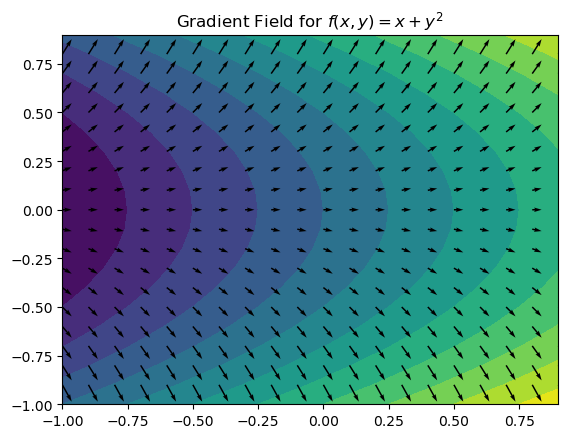

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient field with contour fields

dx = 0.1                                            # Step spacing
dy = 0.1
x = np.arange(-1, 1, dx)                            # List of 20 numbers
y = np.arange(-1, 1, dy)

x, y = np.meshgrid (x, y, indexing = 'ij')          # Create grid corresponding to x and y arrays
f = x + y*y                                         # Function f(x,y) 

gradx, grady = np.gradient (f, dx, dy)              # Calculating the gradient vector components
n = 12                                              # Number of contour fields

plt.contourf(x, y, f, n)                            # Filled contours
plt.quiver(x, y, gradx , grady)                     # Gradient vectors 
plt.title('Gradient Field for $f(x,y) = x +  y^2$') # $ $ for math expression
plt.show()